### **Introduction** 
https://github.com/uic-cs418/group-project-data-minds/blob/main/FinalProject.ipynb

**Group Members:** Mykola Turchak, Shaun Shannon, Shriraj Patel, Larry Bryant, Acharya Pravin

We are team Data Minds, and our project StudySync aims to identify and analyze behavioral and lifestyle factors that significantly impact students’ academic performance. We are using real-world datasets that include features like sleep patterns, study habits, attendance, drug use, and GPA. The goal is to visualize correlations (like attendance vs. GPA) and apply binary classification models (like predicting poor academic performance based on drug use) to help students understand what behaviors positively or negatively influence their grades.

### **1. Data**

#### **Cleaned Mendeley Dataset for relationship between attendance and GPA visualization**
- The original data used is in Mendeley\Students_Performance_data_set.xlsx, and the scripts used to clean the data are in the create_attendance_dataframe() function in main.py.

In [1]:
from main import create_attendance_dataframe
df_attendance = create_attendance_dataframe()
df_attendance.head(3)

,Average attendance on class,What is your current CGPA?,Attendance,GPA,Count,Attendance Sum,%
138,2,2.68,4,2,21,36,58.333333
168,40,2.40,4,2,21,36,58.333333
774,45,2.79,4,2,21,36,58.333333


In [3]:
from main import create_sleep_dataframe
sleep_df = create_sleep_dataframe()
sleep_df.head(3)

,Current GPA,Hours of sleep,Time going to bed,Wake up time
0,3.4,10,Between 10pm and 12am,Between 10am and 12pm
1,3.2,10,After 2am,After 12pm
2,3.1,10,After 2am,Between 10am and 12pm


#### **Cleaned Harvard Dataset for predicting drug use from grades ML**
- The original data used is in Harvard\Student Data set.xlsx, and the scripts used to clean the data are in the preprocess_data() function in main.py.

In [4]:
from main import (
    load_grade_data,
    preprocess_data,
    plot_enhanced_roc_curve)

df = load_grade_data()
prepared_df = preprocess_data(df)
prepared_df.head(3)

Initial rows: 1720
Final cleaned rows: 691


,Type_of_Institute,County,Gender,Age,Disability,Religion,LivedP,ConflictsP,FStructure,DFeesPay,...,Unnamed: 16369,Unnamed: 16370,Unnamed: 16371,Unnamed: 16372,Unnamed: 16373,Unnamed: 16374,Unnamed: 16375,AvgGrade,ADrugs_cleaned,ADrugs_binary
662,np,km,1,3.0,NO,1.0,no,yes,nf,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,no,0.0
664,np,km,0,2.0,NO,1.0,yes,yes,nf,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,no,0.0
1009,TT,NB,1,3.0,NO,1.0,no,NO,EF,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,no,0.0


#### **GPA vs Social Media:**



In [6]:
from main import (
    load_social_data,
    preprocess_social_data,
    plot_gpa_by_social_media_time)

df = load_social_data()
cleaned_df = preprocess_social_data(df)
cleaned_df.head(3)

,University Admission year,Gender,Age,H.S.C passing year,Program,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,How many times do you seat for study in a day?,...,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?,GPA Range,SocialMediaTime
0,2018,Male,24,2016,BCSE,12,Yes,No,3,2,...,Yes,Bachelor,No,2.68,No,3.15,75,25000,3–3.99,3–5 hrs
1,2021,Male,22,2020,BCSE,4,Yes,Yes,3,2,...,Yes,Family,No,2.68,No,3.15,36,100000,3–3.99,1–3 hrs
2,2020,Female,21,2019,BCSE,5,No,No,3,3,...,No,Bachelor,No,2.68,No,3.15,50,50000,3–3.99,1–3 hrs


### **2. ML/Stats**

### Predicting Drug Use from Grades

Rows available for training: 691

✅ AUC Score: 0.668


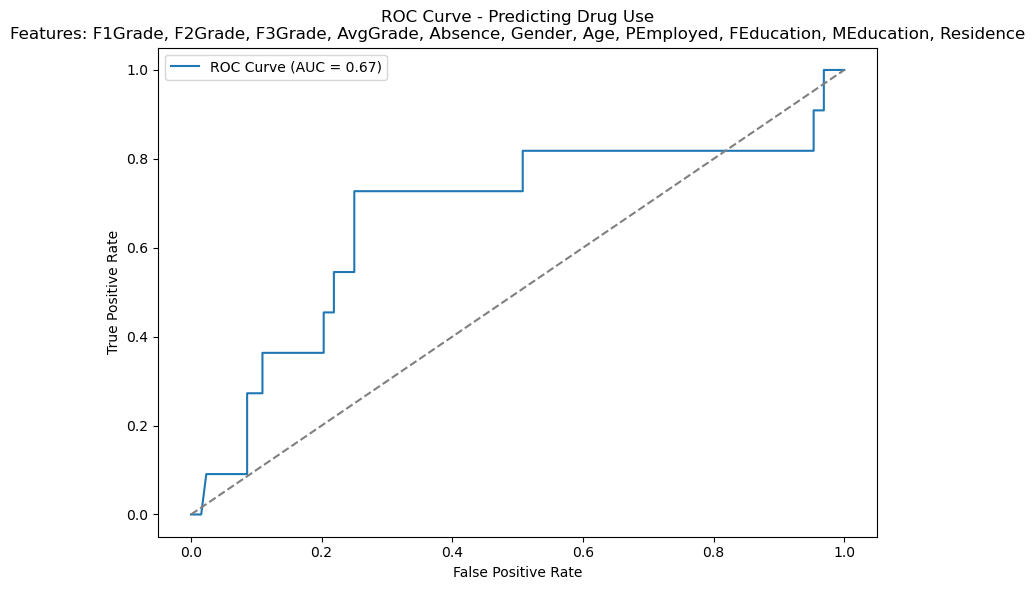

In [3]:
plot_enhanced_roc_curve(prepared_df)


### **Exploratory Data Analysis:**  
- ROC Curve: Predicting Drug Use

The Area Under the Curve, AUC, value was calculated to quantify the model's performance. A higher AUC (closer to 1) indicates a better-performing model. The ROC curve helps visualize the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate, offering insights into how effectively grades, absence, gender etc can act as predictors for potential drug use among students.

### **Modeling CGPA Based on Student Habits with Random Forest**

In [2]:
!python RandomForest.py


Model Evaluation:
Mean Squared Error (MSE): 0.05340776687238494
R-squared (R²): 0.8960413895895311


### **Exploratory Data Analysis:**  
- Feature Impact: Predicting CGPA with Random Forest

The Random Forest model helped identify which features had the strongest influence on predicting a student’s CGPA. Key predictors included previous SGPA, attendance, daily study hours, and time spent on social media. By analyzing feature importance scores, we gained insights into which academic and behavioral factors most strongly affect academic performance. This informed our understanding of how student habits and background characteristics correlate with GPA outcomes.

### **3. Visualization**

#### **Relationship between Sleep and GPA**

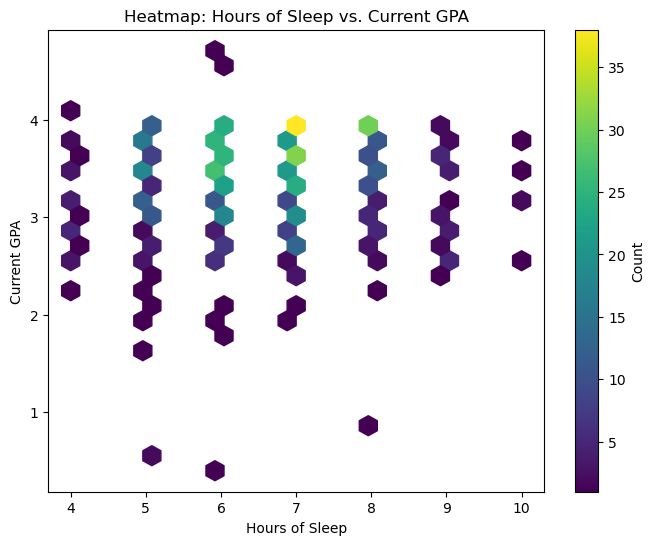

In [6]:
from main import create_sleep_dataframe, create_sleep_visualization
df_sleep = create_sleep_dataframe()
create_sleep_visualization(df_sleep)

#### Exploratory Data Analysis:
   - **Data Distribution:** The heatmap shows that many students cluster around specific sleep durations, with a notable density between 6–8 hours.  
   - **Preliminary Insight:** Higher GPA values appear to be associated with certain sleep ranges, suggesting a potential optimal range of sleep for academic success.  
   - **Variability:** There are areas with sparse data, which might indicate outliers or less common sleep patterns.

### **Examining the relationship between attendance and GPA**

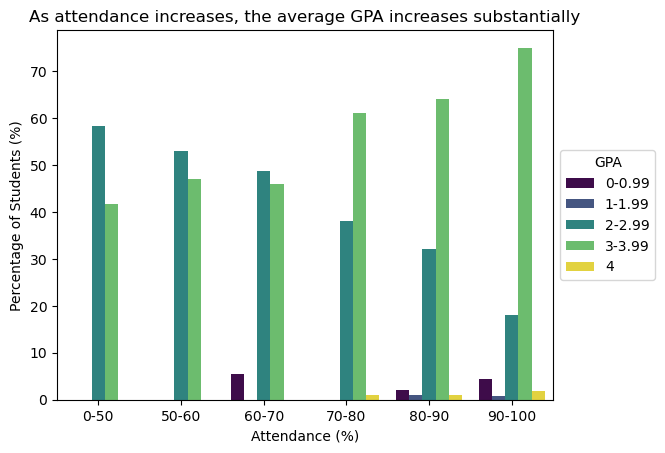

In [14]:
from main import create_attendance_visualization
create_attendance_visualization(df_attendance)

### **Exploratory Data Analysis:**  
   - **Data Distribution:** The bar chart shows that there is a clear direct relationship between a student's attendance and their GPA.  
   - **Preliminary Insight:** Higher attendance percentage values appear to be associated with higher GPA ranges, and this relationship is incredibly strong, even more so than I was expecting. It seems that regardless of a student's current attendance percentage, improving their attendance is very likely to cause their GPA to increase in some capacity. The percentage of students with a GPA from 2-2.99 steadily decreases as attendance increases, and inversely the percentage of students with a GPA from 3-3.99 steadily increases, and this causes the average GPA to increase dramatically as attendance increases. 
   - **Variability:** Very few students in the dataset have GPA values that are under 2, so those values function as outliers. However, while perfect GPA values of 4 are extremely rare, you can see that there are no students with a GPA of 4 with an attendance percentage below 70%, and the majority of students with a perfect GPA have 90-100% attendance, or near perfect or perfect attendance.

### **4. Additional Work**

### **GPA Distribution by Time Spent on Social Media**

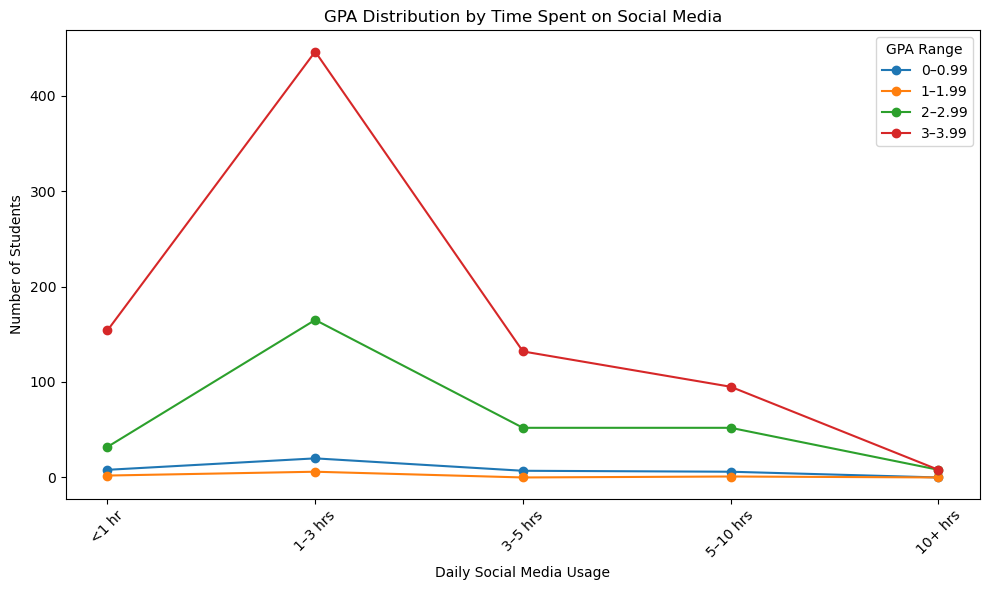

In [17]:
from main import plot_gpa_by_social_media_time
plot_gpa_by_social_media_time()

### **Exploratory Data Analysis:**

- **Data Distribution:** The line graph shows that most students fall into the `3.0–3.99` GPA range, with the highest concentration in the `1–3 hour` social media usage group.
- **Preliminary Insight:** Students who spend **5 or more hours per day** on social media are considerably less likely to achieve high GPAs. While some students still maintain GPAs in the 2.0–2.99 range under heavier usage, very few remain in the top performance tier.
- **Variability:** The graph highlights that even students who spend less than 1 hour on social media are spread across all GPA ranges — suggesting that low usage doesn’t guarantee high performance, but heavy usage is more consistently associated with lower GPA distributions. The trend across all GPA categories shows the most favorable academic outcomes occur under moderate usage (1–3 hrs/day).

### **5. Results**

After cleaning our data, we applied a logistic regression to predict drug use from grades and a Random Forest regressor to predict GPA from 17 features (attendance, prior SGPA, study time, sleep, social media use, etc.). The logistic model achieved an AUC of about 0.60, indicating that grades alone are only a moderate predictor of drug use. The Random Forest explained 90% of GPA variance (R² = 0.896) with an MSE of 0.053 or about 70% better than a mean‐only baseline. We also created four distinct visualizations, attendance vs. GPA bar chart, sleep vs. GPA hexbin, social media vs. GPA line graph, and ROC curve, and confirmed via a t-test that students with ≥ 90% attendance have significantly higher GPAs than those with < 70% (p < 0.01).

Key findings:

- Attendance is the strongest single predictor of GPA.

- 6–8 hours of sleep aligns with the highest GPAs.

- 1–3 hrs/day of social media use correlates with better academic outcomes than very low or heavy use.

- Grades alone only moderately predict drug use (AUC ≈ 0.60).

- Combining lifestyle and academic factors via Random Forest captures 90% of GPA variability.